In [237]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.units
from astropy import constants as const
import collections, numpy
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator

In [469]:
#Defining Variables and constants

Big_M = (1e8 * const.M_sun.value) #kg
Obj_Radius = 0.1 * const.au.value # m
vi = 2e9 #m/s
xi = 4*const.au.value
ymax = const.au.value  #m
#ypos=np.linspace(0,1,int(N)+1)[1:]*(ymax)


    
dt = 6 # second time step
N = 1000 #Number of steps 
 

colors = mpl.cm.get_cmap()(np.linspace(0.0, 1.0, int(N))) # setting colors for data pts


escape_vel= np.sqrt(2*const.G.value * Big_M/xi)
print(f"escape velocity = {escape_vel/1e5:.4e}")
escape_time = xi/(escape_vel * vi)
#print(f"escape time = {time:.4e}")
dt,ymax

escape velocity = 2.1061e+03


(6, 149597870700.0)

In [470]:

#setting y values for each small mass object ???
yvals = np.linspace(0.0, 1.0, int(N)+1)[1:] * ymax

#setting the same value of x for each small mass to start at in cm
xvals = np.ones_like(yvals) * xi

#Setting the velocity for each particle in the x direction. 
# Does this mean each particle starts out at the same velocity???
xvel = vi * np.ones_like(yvals)

#velocity in y direction. Since this is a 1-D problem I am assuming 
#that's why this velocity should be zero ???
yvel = np.zeros_like(yvals)


In [471]:
#Getting arrays for xpos, ypos, xvel, yvel, y_acceleration, x_acceleration for a time step
#of 2 SECONDS
t = 0
P=10
vy = np.zeros(P)
vx = np.ones(P)*(-vi)
y=np.linspace(0,1,int(P)+1)[1:]*(ymax)
#x = np.zeros(P)
x = np.ones(P)*xi

Time = np.zeros((P,N))     
Xpos = np.zeros((P,N))
Ypos = np.zeros((P,N))
Yvel = np.zeros((P,N))
Xvel = np.zeros((P,N))
print('          x', '               y')
for i in range(N): #Avoid square arrays!!!
    print("i=", i)
    for j in range(P):
        print("j=",j)
        # here are the calculations
        t = t + dt  #incrementing time value by dt
        A_x = ((-const.G.value*Big_M/((x[j]**2+y[j]**2)**(3/2)))*x[j])
        A_y = ((-const.G.value*Big_M/((x[j]**2+y[j]**2)**(3/2)))*y[j])
        #print(A_x,A_y)
        #continue
        vx[j] = vx[j] + A_x * dt 
        vy[j] = vy[j] + A_y * dt
        #print((vx),(vy))
        #continue
        x[j] = x[j] + vx[j] * dt
        y[j] = y[j] + vy[j] * dt 
        #print(x)
        #continue
        Time[j,i] = t
        Xpos[j,i] = x[j]
        Ypos[j,i] = y[j]
        Xvel[j,i] = vx[j]
        Yvel[j,i] = vy[j]
        #print((Xvel))
        #continue
    print(Xpos[:,i])
    #break

          x                y
i= 0
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.86390150e+11 5.86390154e+11 5.86390160e+11 5.86390168e+11
 5.86390179e+11 5.86390192e+11 5.86390208e+11 5.86390225e+11
 5.86390244e+11 5.86390265e+11]
i= 1
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.74387429e+11 5.74387440e+11 5.74387459e+11 5.74387486e+11
 5.74387519e+11 5.74387560e+11 5.74387607e+11 5.74387660e+11
 5.74387718e+11 5.74387782e+11]
i= 2
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.62383261e+11 5.62383285e+11 5.62383324e+11 5.62383378e+11
 5.62383448e+11 5.62383531e+11 5.62383627e+11 5.62383736e+11
 5.62383857e+11 5.62383987e+11]
i= 3
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.50377584e+11 5.50377625e+11 5.50377692e+11 5.50377786e+11
 5.50377904e+11 5.50378047e+11 5.50378212e+11 5.50378399e+11
 5.50378605e+11 5.50378829e+11]
i= 4
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.38370332e+11 5.38370395e+11 5.38370499e+11 5.38370643e+11
 5.38370827e+11 5.3

i= 92
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-4.97267971e+11 -5.22773449e+11 -5.27274877e+11 -5.27908170e+11
 -5.27612701e+11 -5.27057550e+11 -5.26442714e+11 -5.25836490e+11
 -5.25262880e+11 -5.24729274e+11]
i= 93
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.08323003e+11 -5.34489346e+11 -5.39152710e+11 -5.39843633e+11
 -5.39574992e+11 -5.39034437e+11 -5.38428384e+11 -5.37827827e+11
 -5.37258057e+11 -5.36727149e+11]
i= 94
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.19376589e+11 -5.46203639e+11 -5.51028908e+11 -5.51777456e+11
 -5.51535647e+11 -5.51009701e+11 -5.50412449e+11 -5.49817579e+11
 -5.49251675e+11 -5.48723494e+11]
i= 95
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.30428791e+11 -5.57916397e+11 -5.62903544e+11 -5.63709710e+11
 -5.63494738e+11 -5.62983409e+11 -5.62394974e+11 -5.61805812e+11
 -5.61243798e+11 -5.60718370e+11]
i= 96
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.41479666e+11 -5.69627684e+11 -5.74776683e+11 -5.75640461e+11

j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.53359418e+12 -1.62091834e+12 -1.64058535e+12 -1.64661885e+12
 -1.64884468e+12 -1.64967117e+12 -1.64989908e+12 -1.64984865e+12
 -1.64966448e+12 -1.64941751e+12]
i= 187
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.54460437e+12 -1.63258467e+12 -1.65241274e+12 -1.65850359e+12
 -1.66075622e+12 -1.66159740e+12 -1.66183431e+12 -1.66178984e+12
 -1.66160987e+12 -1.66136603e+12]
i= 188
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.55561441e+12 -1.64425083e+12 -1.66423996e+12 -1.67038816e+12
 -1.67266757e+12 -1.67352346e+12 -1.67376936e+12 -1.67373085e+12
 -1.67355509e+12 -1.67331438e+12]
i= 189
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.56662430e+12 -1.65591683e+12 -1.67606701e+12 -1.68227256e+12
 -1.68457876e+12 -1.68544935e+12 -1.68570425e+12 -1.68567170e+12
 -1.68550015e+12 -1.68526256e+12]
i= 190
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.57763404e+12 -1.66758267e+12 -1.68789390e+12 -1.69415679e+12
 -1.69648978e+12 -1.6

j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.59008414e+12 -2.74034907e+12 -2.77546903e+12 -2.78700471e+12
 -2.79180075e+12 -2.79403784e+12 -2.79512890e+12 -2.79565074e+12
 -2.79587074e+12 -2.79592455e+12]
i= 283
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.60108559e+12 -2.75200578e+12 -2.78728665e+12 -2.79887962e+12
 -2.80370241e+12 -2.80595420e+12 -2.80705424e+12 -2.80758204e+12
 -2.80780625e+12 -2.80786319e+12]
i= 284
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.61208697e+12 -2.76366243e+12 -2.79910420e+12 -2.81075446e+12
 -2.81560402e+12 -2.81787049e+12 -2.81897952e+12 -2.81951328e+12
 -2.81974171e+12 -2.81980178e+12]
i= 285
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.62308831e+12 -2.77531902e+12 -2.81092170e+12 -2.82262925e+12
 -2.82750557e+12 -2.82978672e+12 -2.83090474e+12 -2.83144446e+12
 -2.83167710e+12 -2.83174031e+12]
i= 286
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.63408959e+12 -2.78697556e+12 -2.82273914e+12 -2.83450397e+12
 -2.83940705e+12

 -3.81021332e+12 -3.81053362e+12]
i= 368
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.53604871e+12 -3.74265112e+12 -3.79160619e+12 -3.80806776e+12
 -3.81516474e+12 -3.81866470e+12 -3.82052857e+12 -3.82156292e+12
 -3.82214504e+12 -3.82246847e+12]
i= 369
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.54704676e+12 -3.75430410e+12 -3.80342002e+12 -3.81993886e+12
 -3.82706258e+12 -3.83057722e+12 -3.83245008e+12 -3.83349039e+12
 -3.83407672e+12 -3.83440329e+12]
i= 370
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.55804477e+12 -3.76595705e+12 -3.81523382e+12 -3.83180992e+12
 -3.83896040e+12 -3.84248972e+12 -3.84437156e+12 -3.84541783e+12
 -3.84600837e+12 -3.84633808e+12]
i= 371
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.56904276e+12 -3.77760997e+12 -3.82704759e+12 -3.84368096e+12
 -3.85085818e+12 -3.85440219e+12 -3.85629301e+12 -3.85734524e+12
 -3.85793999e+12 -3.85827283e+12]
i= 372
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.58004072e+12 -3.78926

 -4.87202729e+12 -4.87262661e+12]
i= 457
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-4.51477889e+12 -4.77966122e+12 -4.84293016e+12 -4.86448797e+12
 -4.87396542e+12 -4.87877190e+12 -4.88143531e+12 -4.88299991e+12
 -4.88395672e+12 -4.88455918e+12]
i= 458
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-4.52577493e+12 -4.79131199e+12 -4.85474174e+12 -4.87635681e+12
 -4.88586101e+12 -4.89068216e+12 -4.89335456e+12 -4.89492512e+12
 -4.89588613e+12 -4.89649172e+12]
i= 459
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-4.53677094e+12 -4.80296275e+12 -4.86655331e+12 -4.88822563e+12
 -4.89775657e+12 -4.90259240e+12 -4.90527378e+12 -4.90685030e+12
 -4.90781552e+12 -4.90842425e+12]
i= 460
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-4.54776694e+12 -4.81461348e+12 -4.87836485e+12 -4.90009444e+12
 -4.90965212e+12 -4.91450263e+12 -4.91719299e+12 -4.91877546e+12
 -4.91974490e+12 -4.92035676e+12]
i= 461
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-4.55876292e+12 -4.82626

j= 8
j= 9
[-5.50435964e+12 -5.82816246e+12 -5.90590369e+12 -5.93261412e+12
 -5.94449836e+12 -5.95062577e+12 -5.95409756e+12 -5.95619828e+12
 -5.95753393e+12 -5.95841852e+12]
i= 548
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.51535436e+12 -5.83981179e+12 -5.91771382e+12 -5.94448150e+12
 -5.95639248e+12 -5.96253457e+12 -5.96601534e+12 -5.96812201e+12
 -5.96946187e+12 -5.97034959e+12]
i= 549
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.52634907e+12 -5.85146112e+12 -5.92952394e+12 -5.95634886e+12
 -5.96828658e+12 -5.97444334e+12 -5.97793310e+12 -5.98004573e+12
 -5.98138980e+12 -5.98228065e+12]
i= 550
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.53734377e+12 -5.86311042e+12 -5.94133404e+12 -5.96821621e+12
 -5.98018067e+12 -5.98635211e+12 -5.98985085e+12 -5.99196944e+12
 -5.99331771e+12 -5.99421170e+12]
i= 551
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.54833846e+12 -5.87475972e+12 -5.95314413e+12 -5.98008355e+12
 -5.99207475e+12 -5.99826086e+12 -6.00176

j= 6
j= 7
j= 8
j= 9
[-6.47185436e+12 -6.85325908e+12 -6.94514948e+12 -6.97689745e+12
 -6.99113470e+12 -6.99855355e+12 -7.00281565e+12 -7.00544052e+12
 -7.00714655e+12 -7.00830697e+12]
i= 636
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-6.48284819e+12 -6.86490744e+12 -6.95695862e+12 -6.98876383e+12
 -7.00302782e+12 -7.01046134e+12 -7.01473242e+12 -7.01736324e+12
 -7.01907348e+12 -7.02023704e+12]
i= 637
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-6.49384202e+12 -6.87655578e+12 -6.96876774e+12 -7.00063019e+12
 -7.01492093e+12 -7.02236912e+12 -7.02664919e+12 -7.02928596e+12
 -7.03100041e+12 -7.03216710e+12]
i= 638
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-6.50483583e+12 -6.88820412e+12 -6.98057686e+12 -7.01249655e+12
 -7.02681402e+12 -7.03427689e+12 -7.03856594e+12 -7.04120867e+12
 -7.04292733e+12 -7.04409716e+12]
i= 639
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-6.51582964e+12 -6.89985245e+12 -6.99238597e+12 -7.02436290e+12
 -7.03870711e+12 -7.04618465e+1

j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-7.48325409e+12 -7.92487200e+12 -8.03155356e+12 -8.06856762e+12
 -8.08526464e+12 -8.09403350e+12 -8.09912177e+12 -8.10229456e+12
 -8.10438778e+12 -8.10583657e+12]
i= 728
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-7.49424724e+12 -7.93651961e+12 -8.04336193e+12 -8.08043323e+12
 -8.09715699e+12 -8.10594052e+12 -8.11103777e+12 -8.11421652e+12
 -8.11631395e+12 -8.11776587e+12]
i= 729
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-7.50524037e+12 -7.94816720e+12 -8.05517030e+12 -8.09229883e+12
 -8.10904933e+12 -8.11784754e+12 -8.12295377e+12 -8.12613847e+12
 -8.12824010e+12 -8.12969516e+12]
i= 730
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-7.51623351e+12 -7.95981479e+12 -8.06697866e+12 -8.10416443e+12
 -8.12094166e+12 -8.12975454e+12 -8.13486975e+12 -8.13806041e+12
 -8.14016625e+12 -8.14162444e+12]
i= 731
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-7.52722663e+12 -7.97146238e+12 -8.07878701e+12 -8.11603002e+12
 -8.13

j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-8.50559128e+12 -9.00807146e+12 -9.12970407e+12 -9.17204113e+12
 -9.19122450e+12 -9.20135796e+12 -9.20728132e+12 -9.21100796e+12
 -9.21349255e+12 -9.21523281e+12]
i= 821
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-8.51658390e+12 -9.01971849e+12 -9.14151185e+12 -9.18390615e+12
 -9.20311626e+12 -9.21326439e+12 -9.21919673e+12 -9.22292932e+12
 -9.22541812e+12 -9.22716152e+12]
i= 822
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-8.52757651e+12 -9.03136551e+12 -9.15331963e+12 -9.19577116e+12
 -9.21500801e+12 -9.22517081e+12 -9.23111213e+12 -9.23485067e+12
 -9.23734369e+12 -9.23909022e+12]
i= 823
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-8.53856912e+12 -9.04301252e+12 -9.16512741e+12 -9.20763617e+12
 -9.22689975e+12 -9.23707723e+12 -9.24302753e+12 -9.24677203e+12
 -9.24926925e+12 -9.25101891e+12]
i= 824
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-8.54956172e+12 -9.05465953e+12 -9.17693518e+12 -9.21950118e+12
 -9.23879149e+12 -9.2

 -1.02986981e+13 -1.03007236e+13]
i= 912
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-9.51689273e+12 -1.00795766e+13 -1.02159988e+13 -1.02636014e+13
 -1.02852443e+13 -1.02967276e+13 -1.03034770e+13 -1.03077515e+13
 -1.03106233e+13 -1.03126519e+13]
i= 913
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-9.52788493e+12 -1.00912232e+13 -1.02278062e+13 -1.02754660e+13
 -1.02971356e+13 -1.03086336e+13 -1.03153920e+13 -1.03196724e+13
 -1.03225484e+13 -1.03245801e+13]
i= 914
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-9.53887714e+12 -1.01028698e+13 -1.02396135e+13 -1.02873305e+13
 -1.03090269e+13 -1.03205395e+13 -1.03273069e+13 -1.03315933e+13
 -1.03344735e+13 -1.03365083e+13]
i= 915
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-9.54986934e+12 -1.01145163e+13 -1.02514208e+13 -1.02991951e+13
 -1.03209181e+13 -1.03324455e+13 -1.03392218e+13 -1.03435142e+13
 -1.03463986e+13 -1.03484366e+13]
i= 916
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-9.56086153e+12 -1.01261

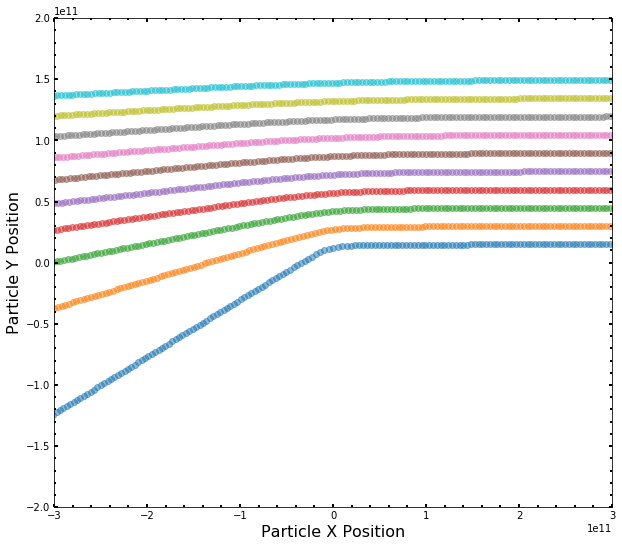

In [49]:
fig, ax = plt.subplots(figsize=[10,9])

for i in range(N):
    for j in range(P):
        ax.scatter(Xpos[j,i], Ypos[j,i], marker='o', alpha=0.5)
        ax.set_ylim(-0.2e12,0.2e12)
        ax.set_xlim(-0.3e12,0.3e12)
        ax.set_xlabel('Particle X Position',fontsize=16)
        ax.set_ylabel('Particle Y Position',fontsize=16)
        ax.tick_params(which='both', direction='in',width=2)
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')



In [127]:
#printing out every 10th term out of 1000 for each particle in the x_direction 
n=100
x_pos=np.zeros((P,n))
for i in range(P):
    x=Xpos[i][::10]
    x_pos[i]=x

In [128]:
#printing out every 10th term out of 1000 for each particle in the y_direction 
n=100
y_pos=np.zeros((P,n))
for i in range(P):
    y=Ypos[i][::10]
    y_pos[i]=y

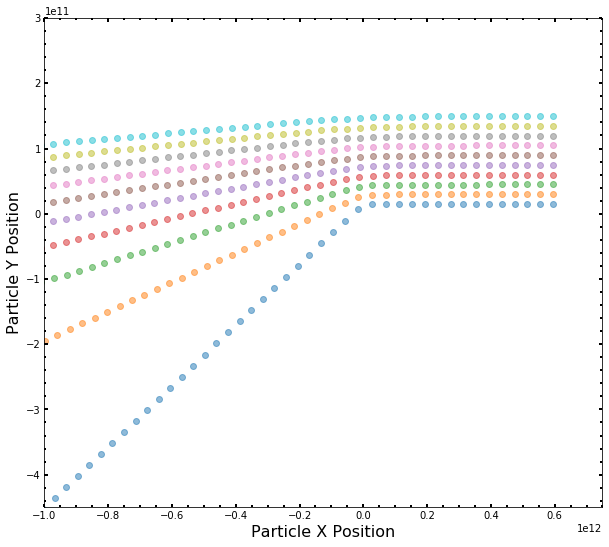

In [129]:
fig, ax = plt.subplots(figsize=[10,9])

for i in range(n):
    for j in range(P):
        ax.scatter(x_pos[j,i], y_pos[j,i], marker='o', alpha=0.5)
        ax.set_ylim(-0.45e12,0.3e12)
        ax.set_xlim(-0.1e13,0.75e12)
        ax.set_xlabel('Particle X Position',fontsize=16)
        ax.set_ylabel('Particle Y Position',fontsize=16)
        ax.tick_params(which='both', direction='in',width=2)
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')

In [472]:
#Defining equation for the Total energy of each particle for N=1000 and a DT of 2 SECONDS
#We use the specific kinetic and potential energy equations 
def TotalE(Xpos,Ypos,Xvel,Yvel):
    TotE=(-const.G.value*Big_M)/(np.sqrt(Xpos**2+Ypos**2))+(0.5*(Xvel**2+Yvel**2))
    return TotE

TotalE(Xpos,Ypos,Xvel,Yvel)

array([[1.97781962e+18, 1.97780993e+18, 1.97779962e+18, ...,
        2.02268796e+18, 2.02268796e+18, 2.02268796e+18],
       [1.97784041e+18, 1.97783078e+18, 1.97782053e+18, ...,
        1.97807996e+18, 1.97807996e+18, 1.97807995e+18],
       [1.97787494e+18, 1.97786541e+18, 1.97785526e+18, ...,
        1.97810359e+18, 1.97810359e+18, 1.97810359e+18],
       ...,
       [1.97824439e+18, 1.97823582e+18, 1.97822674e+18, ...,
        1.97846146e+18, 1.97846146e+18, 1.97846146e+18],
       [1.97835489e+18, 1.97834659e+18, 1.97833781e+18, ...,
        1.97856858e+18, 1.97856857e+18, 1.97856857e+18],
       [1.97847641e+18, 1.97846840e+18, 1.97845995e+18, ...,
        1.97868642e+18, 1.97868642e+18, 1.97868642e+18]])

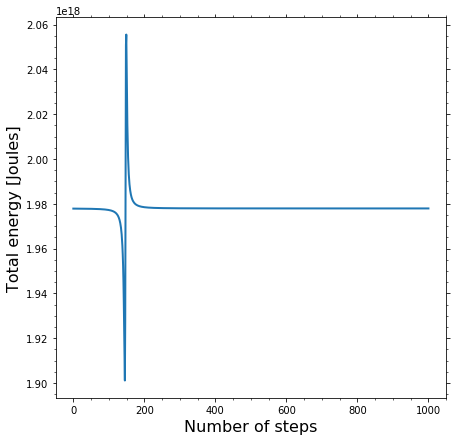

In [131]:
#Testing out how the total energy behaves for one particle 
fig, ax = plt.subplots(figsize=[7,7])
y_axis=np.linspace(0,1000,1000)
#ax.plot(y_axis,(Xpos[0]**2+Ypos[0]**2),color='red')
ax.plot(y_axis,TotalE(Xpos,Ypos,Xvel,Yvel)[0], lw=2)
ax.set_xlabel('Number of steps',fontsize=16)
ax.set_ylabel('Total energy [Joules]', fontsize=16)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())        
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#ax.set_yscale('log')

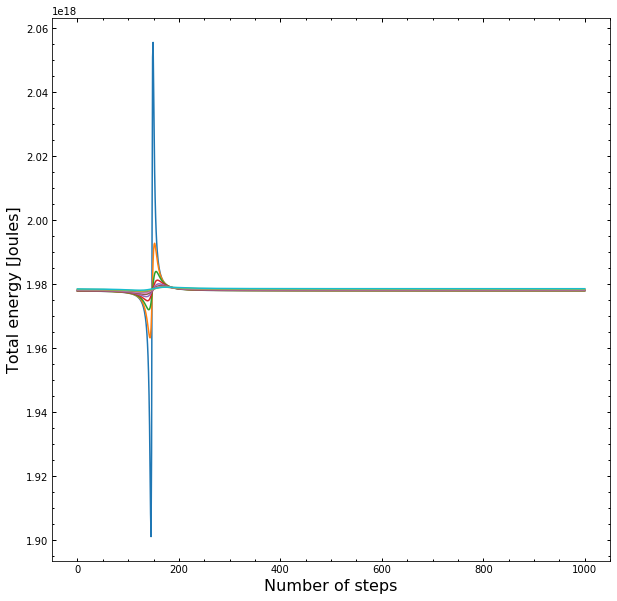

In [35]:
fig, ax = plt.subplots(figsize=[10,10])
y_axis=np.linspace(0,1000,1000)
for i in range(P): 
    ax.plot(y_axis,TotalE(Xpos,Ypos,Xvel,Yvel)[i])
    ax.set_xlabel('Number of steps',fontsize=16)
    ax.set_ylabel('Total energy [Joules]', fontsize=16)
    ax.tick_params(which='both', direction='in',width=1)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    
#All particles seem to start at a lower total energy. Then as the positions of the
#particles change the energy peaks at a certain value within the first 25-50 steps
#(those values are listed below) & then the total energy slowly decreases from then on.

#Why is the blue line offset from the rest...? Check final energy of each particle to see which is the blue line.


#Plot of TOTAL ENERGIES WITH dt of 2 seconds 

In [473]:
#max energy of particle minus min energy of particle
Max_MinDiff=np.zeros(P)
for i in range(P):
    Diff=np.max(TotalE(Xpos,Ypos,Xvel,Yvel)[i])-np.min(TotalE(Xpos,Ypos,Xvel,Yvel)[i])
    Max_MinDiff[i]=Diff  
Max_MinDiff[4]

1.200776436734336e+16

In [424]:
#Max energy minus min enrgy of 0th particle with different time steps (2,4,6,...,20)
Max_MinDiff_0=[1.5440205788685312*10**17,3.094702915806313*10**17,4.939970922519132*10**17,
                3.296311772184161*10**17,7.564789445054277*10**17,6.16314527145706*10**17,
                1.349921292859903*10**18,1.0890879332599283*10**18,1.2858568708001485*10**18,
                7.020134961370317*10**17]
Max_MinDiff_0arr=np.array(Max_MinDiff_L)
Max_MinDiff_0arr

array([1.54402058e+17, 3.09470292e+17, 4.93997092e+17, 3.29631177e+17,
       7.56478945e+17, 6.16314527e+17, 1.34992129e+18, 1.08908793e+18,
       1.28585687e+18, 7.02013496e+17])

In [426]:
Max_MinDiff_1=[2.956236962224*10**16,5.838028148090906*10**16,8.927823186101043*10**16,
              1.1636378390131226*10**17,1.420629235104128*10**17,1.5808060152920627*10**17,
              2.110488569226844*10**17,2.3169325461752755*10**17,2.9162233613447834*10**17,
              1.0935998257787315*10**17]
Max_MinDiff_1arr=np.array(Max_MinDiff_1)
Max_MinDiff_1arr

array([2.95623696e+16, 5.83802815e+16, 8.92782319e+16, 1.16363784e+17,
       1.42062924e+17, 1.58080602e+17, 2.11048857e+17, 2.31693255e+17,
       2.91622336e+17, 1.09359983e+17])

In [440]:
Max_MinDiff_2=[1.1965836394191104*10**16,2.398362542168909*10**16,3.590086361189325*10**16,
               4.714224224284032*10**16,5.809919321021798*10**16,7.115490869124147*10**16,
               7.833000847902336*10**16,9.081284867895936*10**16,9.793673007671168*10**16,
               1.054679112954688*10**17]
Max_MinDiff_2arr=np.array(Max_MinDiff_2)
Max_MinDiff_2arr

array([1.19658364e+16, 2.39836254e+16, 3.59008636e+16, 4.71422422e+16,
       5.80991932e+16, 7.11549087e+16, 7.83300085e+16, 9.08128487e+16,
       9.79367301e+16, 1.05467911e+17])

In [441]:
Max_MinDiff_3=[6437132995009536.0,1.2825855481742848*10**16,1.922488341578675*10**16,
               2.5748772447509504*10**16,3.227072410304973*10**16,3.765842208157414*10**16,
               4.513524621807411*10**16,4.963315221924429*10**16,5.47482829983273*10**16,
               6.49206057330473*10**16]
Max_MinDiff_3arr=np.array(Max_MinDiff_3)
Max_MinDiff_3arr

array([6.43713300e+15, 1.28258555e+16, 1.92248834e+16, 2.57487724e+16,
       3.22707241e+16, 3.76584221e+16, 4.51352462e+16, 4.96331522e+16,
       5.47482830e+16, 6.49206057e+16])

In [474]:
Max_MinDiff_4=[4006009563062272.0,8009850452107776.0,1.200776436734336*10**16,
               1.590142083085824*10**16,1.968470349984307*10**16,2.413561730351565*10**16,
               2.7720639849178624*10**16,3.158362171730304*10**16,3.577672267829811*10**16,
               3.946237116696397*10**16]
Max_MinDiff_4arr=np.array(Max_MinDiff_4)
Max_MinDiff_4arr

array([4.00600956e+15, 8.00985045e+15, 1.20077644e+16, 1.59014208e+16,
       1.96847035e+16, 2.41356173e+16, 2.77206398e+16, 3.15836217e+16,
       3.57767227e+16, 3.94623712e+16])

In [443]:
Max_MinDiff_5=[2732922968288768.0,5465821194505472.0,8200925302586368.0,1.0903502471950848*10**16,
               1.369407766206592*10**16,1.609476770743552*10**16,1.8906348580096*10**16,
               2.1765358934992896*10**16,2.423170451636352*10**16,2.6016240681833216*10**16]
Max_MinDiff_5arr=np.array(Max_MinDiff_5)
Max_MinDiff_5arr

array([2.73292297e+15, 5.46582119e+15, 8.20092530e+15, 1.09035025e+16,
       1.36940777e+16, 1.60947677e+16, 1.89063486e+16, 2.17653589e+16,
       2.42317045e+16, 2.60162407e+16])

In [444]:
Max_MinDiff_6=[1981747521484544.0,3963102713081344.0,5948154316272384.0,7935555250801920.0,
               9832072606178560.0,1.1917432885779456*10**16,1.3914227198083328*10**16,
               1.5718488372910592*10**16,1.7715952388900096*10**16,1.9707694523897856*10**16]
Max_MinDiff_6arr=np.array(Max_MinDiff_6)
Max_MinDiff_6arr

array([1.98174752e+15, 3.96310271e+15, 5.94815432e+15, 7.93555525e+15,
       9.83207261e+15, 1.19174329e+16, 1.39142272e+16, 1.57184884e+16,
       1.77159524e+16, 1.97076945e+16])

In [445]:
Max_MinDiff_7=[1502931829630976.0,3004554482328832.0,4508460951256320.0,5994957771429632.0,
               7521325950558464.0,8939518875217152.0,1.0387263865678336*10**16,1.1923440666633728*10**16,
               1.3402847368120064*10**16,1.5076240605562112*10**16]
Max_MinDiff_7arr=np.array(Max_MinDiff_7)
Max_MinDiff_7arr

array([1.50293183e+15, 3.00455448e+15, 4.50846095e+15, 5.99495777e+15,
       7.52132595e+15, 8.93951888e+15, 1.03872639e+16, 1.19234407e+16,
       1.34028474e+16, 1.50762406e+16])

In [446]:
Max_MinDiff_8=[1178394339678976.0,2355960361805568.0,3533775578280448.0,4709562934508288.0,
               5874097871948288.0,7073522496486912.0,8245829675513600.0,9422334879959808.0,
               1.0559540486518016*10**16,1.1662709439900672*10**16]
Max_MinDiff_8arr=np.array(Max_MinDiff_8)
Max_MinDiff_8arr

array([1.17839434e+15, 2.35596036e+15, 3.53377558e+15, 4.70956293e+15,
       5.87409787e+15, 7.07352250e+15, 8.24582968e+15, 9.42233488e+15,
       1.05595405e+16, 1.16627094e+16])

In [447]:
Max_MinDiff_9=[948805322499072.0,1897935073669888.0,2843765705632256.0,3797579828138496.0,
               4745190420560384.0,5680078135211520.0,6641920345782272.0,7568664593981696.0,
               8514834078211328.0,9356524439206144.0]
Max_MinDiff_9arr=np.array(Max_MinDiff_9)
Max_MinDiff_9arr

array([9.48805322e+14, 1.89793507e+15, 2.84376571e+15, 3.79757983e+15,
       4.74519042e+15, 5.68007814e+15, 6.64192035e+15, 7.56866459e+15,
       8.51483408e+15, 9.35652444e+15])

In [448]:
dt_array=np.arange(2,22,2)
dt_array

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

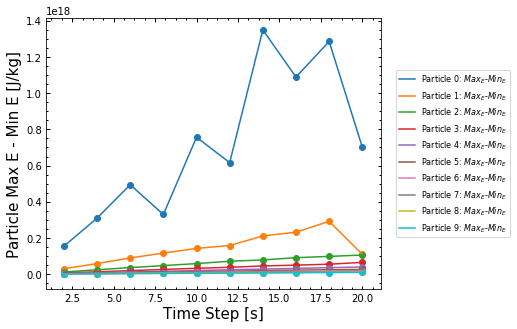

In [518]:
#Difference in max and min energy vs different time steps (2,4,6,..,20)
fig, ax = plt.subplots(figsize=[6,5])
plt.scatter(dt_array,Max_MinDiff_0arr)
plt.plot(dt_array,Max_MinDiff_0arr, label='Particle 0: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_1arr)
plt.plot(dt_array,Max_MinDiff_1arr, label='Particle 1: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_2arr)
plt.plot(dt_array,Max_MinDiff_2arr, label='Particle 2: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_3arr)
plt.plot(dt_array,Max_MinDiff_3arr, label='Particle 3: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_4arr)
plt.plot(dt_array,Max_MinDiff_4arr, label='Particle 4: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_5arr)
plt.plot(dt_array,Max_MinDiff_5arr, label='Particle 5: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_6arr)
plt.plot(dt_array,Max_MinDiff_6arr, label='Particle 6: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_7arr)
plt.plot(dt_array,Max_MinDiff_7arr, label='Particle 7: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_8arr)
plt.plot(dt_array,Max_MinDiff_8arr, label='Particle 8: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_9arr)
plt.plot(dt_array,Max_MinDiff_9arr, label='Particle 9: $Max_E$-$Min_E$')


plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5),prop={'size': 8})
ax.set_xlabel('Time Step [s]',fontsize=15)
ax.set_ylabel('Particle Max E - Min E [J/kg]',fontsize=15)
#ax.set_yscale('log')
ax.tick_params(which='both', direction='in',width=1)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())            
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

In [504]:
Max_MinDiff_9arr/Init_E

array([0.00047972, 0.0009596 , 0.00143778, 0.00191998, 0.00239899,
       0.00287153, 0.00335764, 0.00382594, 0.00430398, 0.00472914])

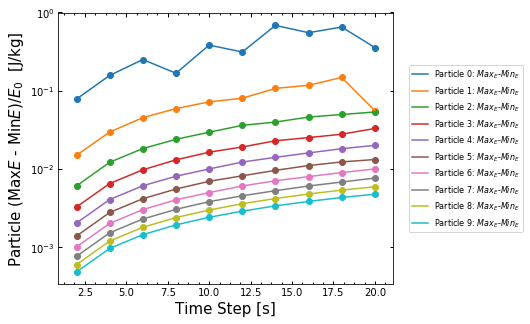

In [512]:
#Difference in max and min energy vs different time steps (2,4,6,..,20)
fig, ax = plt.subplots(figsize=[6,5])
plt.scatter(dt_array,Max_MinDiff_0arr/Init_E)
plt.plot(dt_array,Max_MinDiff_0arr/Init_E, label='Particle 0: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_1arr/Init_E)
plt.plot(dt_array,Max_MinDiff_1arr/Init_E, label='Particle 1: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_2arr/Init_E)
plt.plot(dt_array,Max_MinDiff_2arr/Init_E, label='Particle 2: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_3arr/Init_E)
plt.plot(dt_array,Max_MinDiff_3arr/Init_E, label='Particle 3: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_4arr/Init_E)
plt.plot(dt_array,Max_MinDiff_4arr/Init_E, label='Particle 4: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_5arr/Init_E)
plt.plot(dt_array,Max_MinDiff_5arr/Init_E, label='Particle 5: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_6arr/Init_E)
plt.plot(dt_array,Max_MinDiff_6arr/Init_E, label='Particle 6: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_7arr/Init_E)
plt.plot(dt_array,Max_MinDiff_7arr/Init_E, label='Particle 7: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_8arr/Init_E)
plt.plot(dt_array,Max_MinDiff_8arr/Init_E, label='Particle 8: $Max_E$-$Min_E$')

plt.scatter(dt_array,Max_MinDiff_9arr/Init_E)
plt.plot(dt_array,Max_MinDiff_9arr/Init_E, label='Particle 9: $Max_E$-$Min_E$')


plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5),prop={'size': 8})
ax.set_xlabel('Time Step [s]',fontsize=15)
ax.set_ylabel('Particle (Max$E$ - Min$E$)/$E_0$  [J/kg]',fontsize=15)
ax.set_yscale('log')
ax.tick_params(which='both', direction='in',width=1)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())            
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

# Convergence testing through Angular Momentum conservation

In [ ]:
## Rewrite Angular Momentum using equ for cross product. 
## look up numpy cross product...? ...

In [1008]:
Xvel[0]

array([-2.00007406e+09, -2.00014811e+09, -2.00022217e+09, -2.00029623e+09,
       -2.00037028e+09, -2.00044434e+09, -2.00051840e+09, -2.00059245e+09,
       -2.00066651e+09, -2.00074057e+09, -2.00081462e+09, -2.00088868e+09,
       -2.00096274e+09, -2.00103679e+09, -2.00111085e+09, -2.00118491e+09,
       -2.00125896e+09, -2.00133302e+09, -2.00140708e+09, -2.00148113e+09,
       -2.00155519e+09, -2.00162925e+09, -2.00170330e+09, -2.00177736e+09,
       -2.00185142e+09, -2.00192547e+09, -2.00199953e+09, -2.00207358e+09,
       -2.00214764e+09, -2.00222170e+09, -2.00229575e+09, -2.00236981e+09,
       -2.00244387e+09, -2.00251792e+09, -2.00259198e+09, -2.00266604e+09,
       -2.00274009e+09, -2.00281415e+09, -2.00288821e+09, -2.00296226e+09,
       -2.00303632e+09, -2.00311038e+09, -2.00318443e+09, -2.00325849e+09,
       -2.00333255e+09, -2.00340660e+09, -2.00348066e+09, -2.00355472e+09,
       -2.00362877e+09, -2.00370283e+09, -2.00377689e+09, -2.00385094e+09,
       -2.00392500e+09, -

In [519]:
#Degining Specific Angular Momentum. 
def AM(Xvel,Yvel,Xpos,Ypos):
    L=(Xvel*Ypos)-(Yvel*Xpos)
    return L
AM(Xvel,Yvel,Xpos,Ypos)[1]

array([-5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -5.98391483e+19, -5.98391483e+19, -5.98391483e+19,
       -5.98391483e+19, -

In [541]:
Init_AM=AM(Xvel,Yvel,Xpos,Ypos)[:,0],
Final_AM=AM(Xvel,Yvel,Xpos,Ypos)[:,999]


((array([-2.99195741e+19, -5.98391483e+19, -8.97587224e+19, -1.19678297e+20,
         -1.49597871e+20, -1.79517445e+20, -2.09437019e+20, -2.39356593e+20,
         -2.69276167e+20, -2.99195741e+20]),),
 array([-2.99195741e+19, -5.98391483e+19, -8.97587224e+19, -1.19678297e+20,
        -1.49597871e+20, -1.79517445e+20, -2.09437019e+20, -2.39356593e+20,
        -2.69276167e+20, -2.99195741e+20]))

<Figure size 432x288 with 0 Axes>

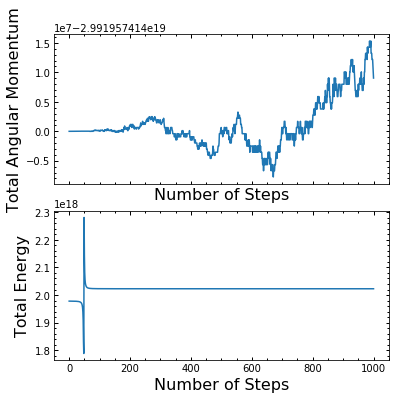

<Figure size 432x288 with 0 Axes>

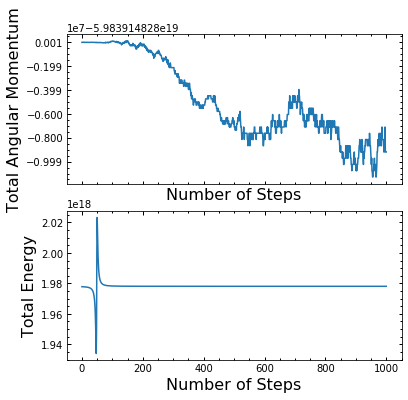

<Figure size 432x288 with 0 Axes>

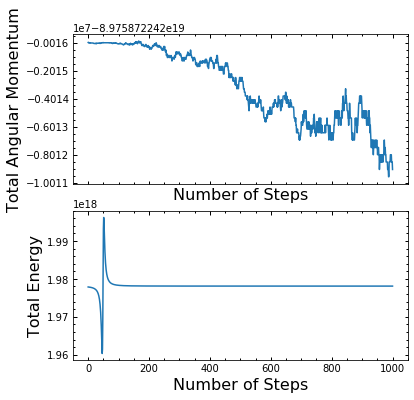

<Figure size 432x288 with 0 Axes>

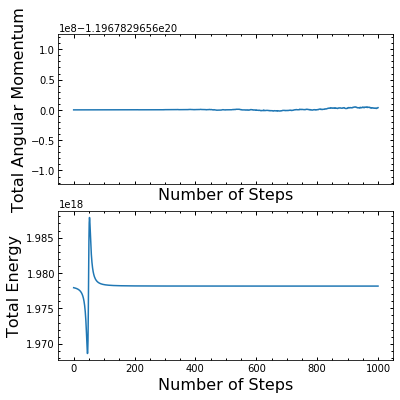

<Figure size 432x288 with 0 Axes>

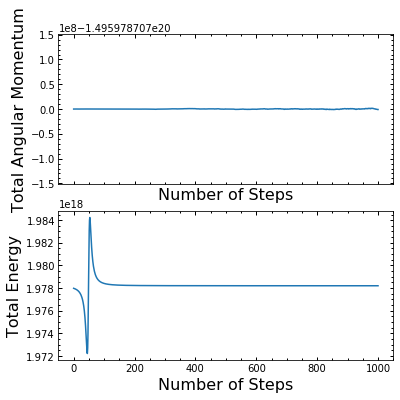

<Figure size 432x288 with 0 Axes>

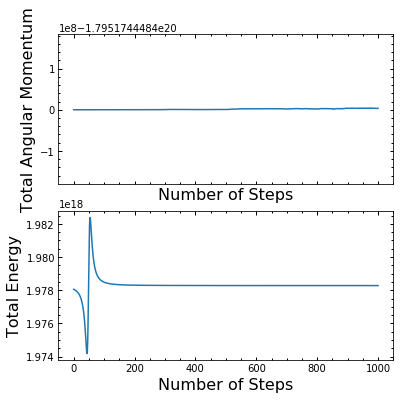

<Figure size 432x288 with 0 Axes>

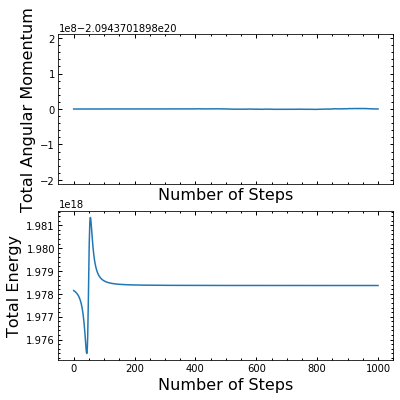

<Figure size 432x288 with 0 Axes>

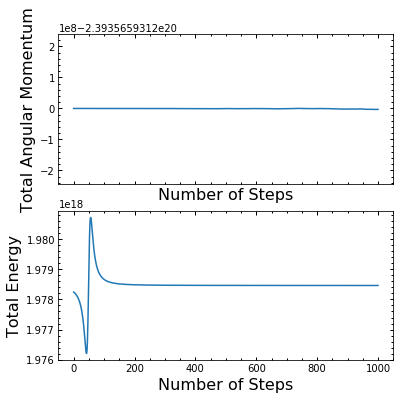

<Figure size 432x288 with 0 Axes>

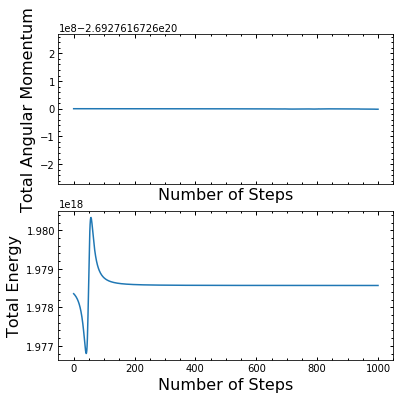

<Figure size 432x288 with 0 Axes>

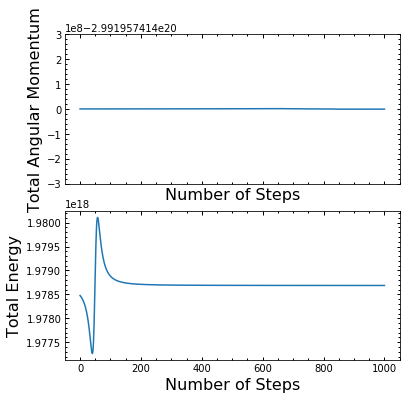

In [538]:
#Plotting Angular Momentum
for i in range(P):
    plt.figure()
    y_axis=np.linspace(0,1000,1000)
    fig, ax = plt.subplots(2,1,figsize=(6,6), sharex=True)

    
    ax[0].plot(y_axis,AM(Xvel,Yvel,Xpos,Ypos)[i])
    ax[0].set_xlabel('Number of Steps',fontsize=16)
    ax[0].set_ylabel('Total Angular Momentum', fontsize=16)
    ax[0].tick_params(which='both', direction='in',width=1)
    ax[0].yaxis.set_minor_locator(AutoMinorLocator())
    ax[0].xaxis.set_minor_locator(AutoMinorLocator())        
    ax[0].yaxis.set_ticks_position('both')
    ax[0].xaxis.set_ticks_position('both')
    ax[1].plot(y_axis,TotalE(Xpos,Ypos,Xvel,Yvel)[i])
    ax[1].set_xlabel('Number of Steps',fontsize=16)
    ax[1].set_ylabel('Total Energy', fontsize=16)
    ax[1].tick_params(which='both', direction='in',width=1)
    ax[1].yaxis.set_minor_locator(AutoMinorLocator())
    ax[1].xaxis.set_minor_locator(AutoMinorLocator())        
    ax[1].yaxis.set_ticks_position('both')
    ax[1].xaxis.set_ticks_position('both')
    plt.subplots_adjust(hspace=0.18);

    

In [526]:
### Try using ergs for plot above ### units of y is J/kg

In [493]:
#Average of the energies per particle
avgE=np.zeros(P)
for i in range(P):
    avg=np.average(TotalE(Xpos,Ypos,Xvel,Yvel)[i])
    avgE[i]=avg 
avgE

array([2.02052844e+18, 1.97809290e+18, 1.97811444e+18, 1.97816041e+18,
       1.97821959e+18, 1.97829143e+18, 1.97837546e+18, 1.97847125e+18,
       1.97857829e+18, 1.97869607e+18])

In [132]:
#Initial and Final energies for each particle. 
Init_E=TotalE(Xpos,Ypos,Xvel,Yvel)[:,0]
Final_E=TotalE(Xpos,Ypos,Xvel,Yvel)[:,999]

In [204]:
#Initial x and y positions for each particle. 
X = np.ones(P)*xi
Y=np.linspace(0,1,int(P)+1)[1:]*(ymax)
X,Y

(array([5.98391483e+11, 5.98391483e+11, 5.98391483e+11, 5.98391483e+11,
        5.98391483e+11, 5.98391483e+11, 5.98391483e+11, 5.98391483e+11,
        5.98391483e+11, 5.98391483e+11]),
 array([1.49597871e+10, 2.99195741e+10, 4.48793612e+10, 5.98391483e+10,
        7.47989354e+10, 8.97587224e+10, 1.04718509e+11, 1.19678297e+11,
        1.34638084e+11, 1.49597871e+11]))

In [205]:
#Initial Distance from large mass for each particle
ri=np.sqrt(X**2+Y**2)
ri

array([5.98578451e+11, 5.99139005e+11, 6.00072099e+11, 6.01375997e+11,
       6.03048296e+11, 6.05085940e+11, 6.07485253e+11, 6.10241970e+11,
       6.13351270e+11, 6.16807822e+11])

In [206]:
#Average and Final Distance of particles w.r.t larger mass
r=np.sqrt(Xpos**2+Ypos**2)
r_avg=np.zeros(P)
for i in range(P):
    avg=np.average(r[i])
    r_avg[i]=avg
rf=r[:,999]
r_avg

array([1.50313760e+12, 1.50008160e+12, 1.49902128e+12, 1.49899511e+12,
       1.49967157e+12, 1.50089056e+12, 1.50255907e+12, 1.50461629e+12,
       1.50701909e+12, 1.50973496e+12])

In [467]:
vy = np.zeros(P)
vx = np.ones(P)*(-vi)

In [841]:
def Accel_x(x,y):
    A_x = ((-const.G.value*Big_M/((X**2+Y**2)**(3/2)))*X)
    return A_x
Accel_x(x,y)

array([-37028.30253133, -36924.46872504, -36752.48720872, -36513.94580206,
       -36211.01958232, -35846.425224  , -35423.36530114, -34945.4645621 ,
       -34416.70038539, -33841.32970807])

In [842]:
def Accel_y(x,y):
    A_y = ((-const.G.value*Big_M/((X**2+Y**2)**(3/2)))*Y)
    return A_y
Accel_y(X,Y)


array([ -925.70756328, -1846.22343625, -2756.43654065, -3651.39458021,
       -4526.37744779, -5376.9637836 , -6199.0889277 , -6989.09291242,
       -7743.75758671, -8460.33242702])

In [464]:
y_acc=Accel_y(X,Y)
x_acc=Accel_x(X,Y)

In [465]:
def vel_x(vx,y_acc):
    vx=vx+x_acc*dt
    return vx
vel_x(vx,x_acc)

array([-2.22819221e+09, -1.95860044e+09, -1.96887607e+09, -1.97789328e+09,
       -1.98230583e+09, -1.98473277e+09, -1.98621532e+09, -1.98719472e+09,
       -1.98788267e+09, -1.98839089e+09])

In [463]:
def vel_y(vy,y_acc):
    vy=vy+y_acc*dt
    return vy
vel_y(vy,y_acc)

array([-4.56979493e+08, -3.98646177e+08, -2.90070520e+08, -2.20014697e+08,
       -1.76312518e+08, -1.46894427e+08, -1.25783208e+08, -1.09897042e+08,
       -9.75062671e+07, -8.75678425e+07])

In [837]:
#Making our euler integration better
t = 0
P=10
vy = np.zeros(P)
vx = np.ones(P)*(-vi)
y=np.linspace(0,1,int(P)+1)[1:]*(ymax)
#x = np.zeros(P)
x = np.ones(P)*xi

Time = np.zeros((P,N))     
Xpos = np.zeros((P,N))
Ypos = np.zeros((P,N))
Yvel = np.zeros((P,N))
Xvel = np.zeros((P,N))
print('          x', '               y')
for i in range(N): #Avoid square arrays!!!
    print("i=", i)
    A_x=Accel_x(x,y)
    A_y=Accel_y(x,y)
    vx=vel_x(vx,x_acc)
    vy=vel_y(vy,y_acc)
    for j in range(P):
        print("j=",j)
        # here are the calculations
        t = t + dt  #incrementing time value by dt
        x[j] = x[j] + vx[j] * dt
        y[j] = y[j] + vy[j] * dt 
        #print(x)
        #continue
        Time[j,i] = t
        Xpos[j,i] = x[j]
        Ypos[j,i] = y[j]
        Xvel[j,i] = vx[j]
        Yvel[j,i] = vy[j]
        #print((Xvel))
        #continue
    print(Xpos[:,i])
    #break
    
#Try plotting results to make sure they still look the same...

          x                y
i= 0
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.94391335e+11 5.94391335e+11 5.94391336e+11 5.94391337e+11
 5.94391338e+11 5.94391339e+11 5.94391341e+11 5.94391343e+11
 5.94391345e+11 5.94391347e+11]
i= 1
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.90391038e+11 5.90391040e+11 5.90391042e+11 5.90391045e+11
 5.90391048e+11 5.90391053e+11 5.90391058e+11 5.90391063e+11
 5.90391070e+11 5.90391077e+11]
i= 2
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.86390594e+11 5.86390597e+11 5.86390601e+11 5.86390606e+11
 5.86390614e+11 5.86390622e+11 5.86390633e+11 5.86390644e+11
 5.86390657e+11 5.86390671e+11]
i= 3
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.82390002e+11 5.82390006e+11 5.82390013e+11 5.82390022e+11
 5.82390034e+11 5.82390049e+11 5.82390066e+11 5.82390085e+11
 5.82390106e+11 5.82390129e+11]
i= 4
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[5.78389261e+11 5.78389267e+11 5.78389278e+11 5.78389292e+11
 5.78389310e+11 5.7

j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[2.41798289e+11 2.41799953e+11 2.41802708e+11 2.41806529e+11
 2.41811382e+11 2.41817223e+11 2.41824000e+11 2.41831656e+11
 2.41840127e+11 2.41849345e+11]
i= 89
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[2.37784959e+11 2.37786660e+11 2.37789477e+11 2.37793384e+11
 2.37798346e+11 2.37804318e+11 2.37811248e+11 2.37819076e+11
 2.37827737e+11 2.37837162e+11]
i= 90
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[2.33771481e+11 2.33773219e+11 2.33776099e+11 2.33780093e+11
 2.33785165e+11 2.33791270e+11 2.33798354e+11 2.33806356e+11
 2.33815210e+11 2.33824844e+11]
i= 91
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[2.29757854e+11 2.29759631e+11 2.29762574e+11 2.29766656e+11
 2.29771840e+11 2.29778079e+11 2.29785318e+11 2.29793496e+11
 2.29802544e+11 2.29812390e+11]
i= 92
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[2.25744080e+11 2.25745895e+11 2.25748902e+11 2.25753073e+11
 2.25758369e+11 2.25764744e+11 2.25772141e+11 2.25780496e+11
 2.

j= 5
j= 6
j= 7
j= 8
j= 9
[-1.19994621e+11 -1.19987930e+11 -1.19976847e+11 -1.19961476e+11
 -1.19941955e+11 -1.19918461e+11 -1.19891199e+11 -1.19860403e+11
 -1.19826329e+11 -1.19789252e+11]
i= 179
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.24021281e+11 -1.24014516e+11 -1.24003309e+11 -1.23987766e+11
 -1.23968027e+11 -1.23944270e+11 -1.23916704e+11 -1.23885564e+11
 -1.23851109e+11 -1.23813618e+11]
i= 180
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.28048090e+11 -1.28041249e+11 -1.28029918e+11 -1.28014202e+11
 -1.27994244e+11 -1.27970223e+11 -1.27942350e+11 -1.27910864e+11
 -1.27876027e+11 -1.27838119e+11]
i= 181
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.32075046e+11 -1.32068130e+11 -1.32056674e+11 -1.32040784e+11
 -1.32020606e+11 -1.31996319e+11 -1.31968138e+11 -1.31936304e+11
 -1.31901082e+11 -1.31862756e+11]
i= 182
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.36102151e+11 -1.36095159e+11 -1.36083577e+11 -1.36067512e+11
 -1.36047112e+11 -1.360225

j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.11270293e+11 -5.11254416e+11 -5.11228120e+11 -5.11191646e+11
 -5.11145327e+11 -5.11089579e+11 -5.11024891e+11 -5.10951819e+11
 -5.10870968e+11 -5.10782992e+11]
i= 276
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.15311320e+11 -5.15295328e+11 -5.15268841e+11 -5.15232103e+11
 -5.15185449e+11 -5.15129297e+11 -5.15064141e+11 -5.14990538e+11
 -5.14909102e+11 -5.14820488e+11]
i= 277
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.19352496e+11 -5.19336388e+11 -5.19309710e+11 -5.19272707e+11
 -5.19225715e+11 -5.19169158e+11 -5.19103531e+11 -5.19029397e+11
 -5.18947373e+11 -5.18858120e+11]
i= 278
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.23393819e+11 -5.23377596e+11 -5.23350726e+11 -5.23313456e+11
 -5.23266127e+11 -5.23209163e+11 -5.23143064e+11 -5.23068397e+11
 -5.22985782e+11 -5.22895887e+11]
i= 279
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-5.27435291e+11 -5.27418952e+11 -5.27391889e+11 -5.27354352e+11
 -5.27306683e+11 -5.2

j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-8.87719465e+11 -8.87691113e+11 -8.87644151e+11 -8.87579015e+11
 -8.87496298e+11 -8.87396742e+11 -8.87281221e+11 -8.87150726e+11
 -8.87006341e+11 -8.86849231e+11]
i= 369
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-8.91774267e+11 -8.91745761e+11 -8.91698545e+11 -8.91633056e+11
 -8.91549891e+11 -8.91449795e+11 -8.91333648e+11 -8.91202445e+11
 -8.91057278e+11 -8.90899316e+11]
i= 370
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-8.95829217e+11 -8.95800557e+11 -8.95753086e+11 -8.95687243e+11
 -8.95603628e+11 -8.95502991e+11 -8.95386216e+11 -8.95254304e+11
 -8.95108353e+11 -8.94949536e+11]
i= 371
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-8.99884315e+11 -8.99855500e+11 -8.99807773e+11 -8.99741575e+11
 -8.99657510e+11 -8.99556330e+11 -8.99438926e+11 -8.99306303e+11
 -8.99159565e+11 -8.98999892e+11]
i= 372
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-9.03939562e+11 -9.03910592e+11 -9.03862608e+11 -9.03796054e+11
 -9.03711537e+11

j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.26544967e+12 -1.26540525e+12 -1.26533167e+12 -1.26522962e+12
 -1.26510003e+12 -1.26494405e+12 -1.26476306e+12 -1.26455861e+12
 -1.26433239e+12 -1.26408624e+12]
i= 462
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.26951825e+12 -1.26947363e+12 -1.26939974e+12 -1.26929725e+12
 -1.26916709e+12 -1.26901044e+12 -1.26882866e+12 -1.26862333e+12
 -1.26839613e+12 -1.26814892e+12]
i= 463
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.27358697e+12 -1.27354216e+12 -1.27346795e+12 -1.27336502e+12
 -1.27323430e+12 -1.27307697e+12 -1.27289441e+12 -1.27268818e+12
 -1.27246001e+12 -1.27221173e+12]
i= 464
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.27765584e+12 -1.27761084e+12 -1.27753631e+12 -1.27743293e+12
 -1.27730165e+12 -1.27714364e+12 -1.27696030e+12 -1.27675318e+12
 -1.27652403e+12 -1.27627467e+12]
i= 465
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.28172486e+12 -1.28167967e+12 -1.28160482e+12 -1.28150099e+12
 -1.28

i= 551
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.63221474e+12 -1.63215135e+12 -1.63204635e+12 -1.63190072e+12
 -1.63171578e+12 -1.63149319e+12 -1.63123491e+12 -1.63094314e+12
 -1.63062033e+12 -1.63026906e+12]
i= 552
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.63629665e+12 -1.63623303e+12 -1.63612765e+12 -1.63598149e+12
 -1.63579588e+12 -1.63557248e+12 -1.63531326e+12 -1.63502044e+12
 -1.63469646e+12 -1.63434391e+12]
i= 553
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.64037870e+12 -1.64031485e+12 -1.64020909e+12 -1.64006240e+12
 -1.63987612e+12 -1.63965192e+12 -1.63939176e+12 -1.63909788e+12
 -1.63877272e+12 -1.63841890e+12]
i= 554
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.64446090e+12 -1.64439682e+12 -1.64429068e+12 -1.64414346e+12
 -1.64395651e+12 -1.64373150e+12 -1.64347040e+12 -1.64317546e+12
 -1.64284913e+12 -1.64249403e+12]
i= 555
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.64854326e+12 -1.64847894e+12 -1.64837242e+12 -1.6482246

j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.97151702e+12 -1.97143315e+12 -1.97129424e+12 -1.97110156e+12
 -1.97085688e+12 -1.97056239e+12 -1.97022068e+12 -1.96983467e+12
 -1.96940757e+12 -1.96894284e+12]
i= 635
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.97561122e+12 -1.97552708e+12 -1.97538773e+12 -1.97519445e+12
 -1.97494900e+12 -1.97465359e+12 -1.97431079e+12 -1.97392357e+12
 -1.97349513e+12 -1.97302893e+12]
i= 636
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.97970557e+12 -1.97962117e+12 -1.97948138e+12 -1.97928749e+12
 -1.97904127e+12 -1.97874492e+12 -1.97840105e+12 -1.97801261e+12
 -1.97758282e+12 -1.97711516e+12]
i= 637
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.98380006e+12 -1.98371540e+12 -1.98357517e+12 -1.98338067e+12
 -1.98313368e+12 -1.98283640e+12 -1.98249145e+12 -1.98210179e+12
 -1.98167066e+12 -1.98120152e+12]
i= 638
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-1.98789471e+12 -1.98780978e+12 -1.98766911e+12 -1.98747400e+12
 -1.98722623e+12 -1.9

j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.33237360e+12 -2.33226489e+12 -2.33208484e+12 -2.33183511e+12
 -2.33151798e+12 -2.33113628e+12 -2.33069338e+12 -2.33019306e+12
 -2.32963950e+12 -2.32903714e+12]
i= 723
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.33648083e+12 -2.33637182e+12 -2.33619128e+12 -2.33594086e+12
 -2.33562285e+12 -2.33524009e+12 -2.33479597e+12 -2.33429427e+12
 -2.33373917e+12 -2.33313515e+12]
i= 724
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.34058821e+12 -2.34047891e+12 -2.34029786e+12 -2.34004675e+12
 -2.33972786e+12 -2.33934405e+12 -2.33889869e+12 -2.33839561e+12
 -2.33783898e+12 -2.33723328e+12]
i= 725
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.34469574e+12 -2.34458613e+12 -2.34440459e+12 -2.34415278e+12
 -2.34383301e+12 -2.34344815e+12 -2.34300156e+12 -2.34249709e+12
 -2.34193892e+12 -2.34133156e+12]
i= 726
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.34880342e+12 -2.34869351e+12 -2.34851147e+12 -2.34825897e+12
 -2.34793832e+12 -2.3

j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.70673841e+12 -2.70660064e+12 -2.70637245e+12 -2.70605595e+12
 -2.70565402e+12 -2.70517027e+12 -2.70460895e+12 -2.70397486e+12
 -2.70327328e+12 -2.70250987e+12]
i= 814
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.71085912e+12 -2.71072101e+12 -2.71049227e+12 -2.71017499e+12
 -2.70977207e+12 -2.70928713e+12 -2.70872443e+12 -2.70808878e+12
 -2.70738548e+12 -2.70662019e+12]
i= 815
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.71497998e+12 -2.71484154e+12 -2.71461223e+12 -2.71429417e+12
 -2.71389026e+12 -2.71340413e+12 -2.71284005e+12 -2.71220284e+12
 -2.71149782e+12 -2.71073065e+12]
i= 816
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.71910099e+12 -2.71896221e+12 -2.71873233e+12 -2.71841350e+12
 -2.71800860e+12 -2.71752128e+12 -2.71695581e+12 -2.71631704e+12
 -2.71561029e+12 -2.71484124e+12]
i= 817
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-2.72322215e+12 -2.72308302e+12 -2.72285259e+12 -2.72253297e+12
 -2.72

j= 7
j= 8
j= 9
[-3.07406181e+12 -3.07389229e+12 -3.07361151e+12 -3.07322206e+12
 -3.07272750e+12 -3.07213225e+12 -3.07144155e+12 -3.07066132e+12
 -3.06979805e+12 -3.06885868e+12]
i= 903
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.07819571e+12 -3.07802581e+12 -3.07774441e+12 -3.07735410e+12
 -3.07685844e+12 -3.07626187e+12 -3.07556964e+12 -3.07478768e+12
 -3.07392250e+12 -3.07298105e+12]
i= 904
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.08232975e+12 -3.08215948e+12 -3.08187745e+12 -3.08148628e+12
 -3.08098952e+12 -3.08039164e+12 -3.07969788e+12 -3.07891419e+12
 -3.07804709e+12 -3.07710356e+12]
i= 905
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.08646394e+12 -3.08629329e+12 -3.08601064e+12 -3.08561860e+12
 -3.08512075e+12 -3.08452154e+12 -3.08382625e+12 -3.08304083e+12
 -3.08217181e+12 -3.08122620e+12]
i= 906
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.09059828e+12 -3.09042725e+12 -3.09014398e+12 -3.08975108e+12
 -3.08925212e+12 -3.08865159e+12 -3.

j= 5
j= 6
j= 7
j= 8
j= 9
[-3.44255842e+12 -3.44235386e+12 -3.44201503e+12 -3.44154508e+12
 -3.44094828e+12 -3.44022999e+12 -3.43939651e+12 -3.43845500e+12
 -3.43741327e+12 -3.43627973e+12]
i= 992
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.44670550e+12 -3.44650052e+12 -3.44616101e+12 -3.44569011e+12
 -3.44509211e+12 -3.44437237e+12 -3.44353722e+12 -3.44259380e+12
 -3.44154997e+12 -3.44041414e+12]
i= 993
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.45085272e+12 -3.45064733e+12 -3.45030714e+12 -3.44983529e+12
 -3.44923609e+12 -3.44851490e+12 -3.44767806e+12 -3.44673274e+12
 -3.44568682e+12 -3.44454870e+12]
i= 994
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.45500009e+12 -3.45479429e+12 -3.45445342e+12 -3.45398062e+12
 -3.45338021e+12 -3.45265757e+12 -3.45181904e+12 -3.45087183e+12
 -3.44982379e+12 -3.44868339e+12]
i= 995
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
[-3.45914761e+12 -3.45894140e+12 -3.45859984e+12 -3.45812609e+12
 -3.45752447e+12 -3.456800

In [566]:
Xpos

array([[ 5.86390150e+11,  5.74387484e+11,  5.62383485e+11, ...,
        -1.20421198e+13, -1.20554515e+13, -1.20687845e+13],
       [ 5.86390154e+11,  5.74387495e+11,  5.62383507e+11, ...,
        -1.20402564e+13, -1.20535843e+13, -1.20669136e+13],
       [ 5.86390160e+11,  5.74387514e+11,  5.62383544e+11, ...,
        -1.20371700e+13, -1.20504917e+13, -1.20638148e+13],
       ...,
       [ 5.86390225e+11,  5.74387709e+11,  5.62383935e+11, ...,
        -1.20047411e+13, -1.20179979e+13, -1.20312559e+13],
       [ 5.86390244e+11,  5.74387766e+11,  5.62384049e+11, ...,
        -1.19952519e+13, -1.20084896e+13, -1.20217286e+13],
       [ 5.86390265e+11,  5.74387828e+11,  5.62384173e+11, ...,
        -1.19849262e+13, -1.19981433e+13, -1.20113616e+13]])

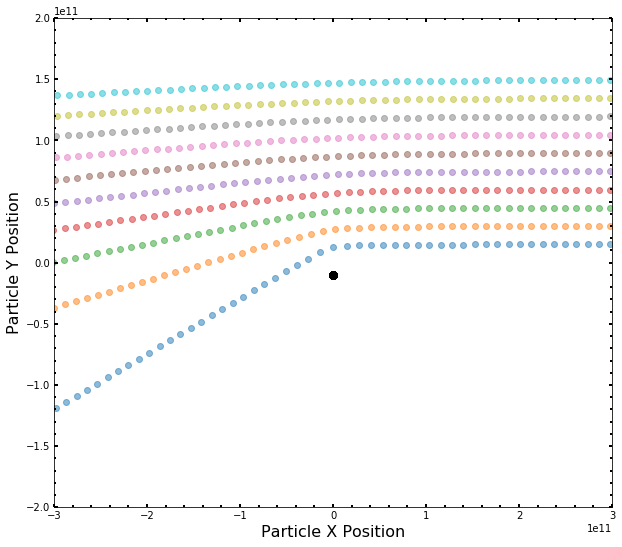

In [537]:
fig, ax = plt.subplots(figsize=[10,9])

for i in range(N):
    for j in range(P):
        ax.scatter(Xpos[j,i], Ypos[j,i], marker='o', alpha=0.5)
        ax.scatter(0,-0.1e11,s=50,color='black')
        ax.set_ylim(-0.2e12,0.2e12)
        ax.set_xlim(-0.3e12,0.3e12)
        ax.set_xlabel('Particle X Position',fontsize=16)
        ax.set_ylabel('Particle Y Position',fontsize=16)
        ax.tick_params(which='both', direction='in',width=2)
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')

# Trying to use Leapfrog integration

In [1017]:
np.shape(Xpos)

(10, 1000)

In [988]:
t = 0
P=10
vy = np.zeros(P)
vx = np.ones(P)*(-vi)
y=np.linspace(0,1,int(P)+1)[1:]*(ymax)
#x = np.zeros(P)
x = np.ones(P)*xi

time = np.zeros((P,N))     
xpos = np.zeros((P,N))
ypos = np.zeros((P,N))
yvel = np.zeros((P,N))
xvel = np.zeros((P,N))

A_x=Accel_x(x,y)
A_y=Accel_y(x,y)
vx=vel_x(vx,x_acc)
vy=vel_y(vy,y_acc)

def leapfrog(x,vx,A_x,dt):
    for i in range(P):
        for j in range(N-1):
            x[i] = x[i] + vx[i] *dt +0.5*A_x[i]*dt**2
            vx[i+1]=vx[i]+0.5*(A_x[i]+A_x[i+1])*dt
            xpos[i,j]=x[j]
    return x,vx



In [989]:
def leapfrog(y,vy,A_y,dt):
    for i in range(P):
        for j in range(N):
            y[i+1]= y[i] + vy[i] *dt +0.5*A_y[i]*dt**2
            vy[i+1]=vy[i]+0.5*(A_y[i]+A_y[i+1])*dt
    return y,vy

In [1004]:
t = 0
P=10
vy = np.zeros(P)
vx = np.ones(P)*(-vi)
y=np.linspace(0,1,int(P)+1)[1:]*(ymax)
#x = np.zeros(P)
x = np.ones(P)*xi

time = np.zeros((P,N))     
xpos = np.zeros((P,N))
ypos = np.zeros((P,N))
yvel = np.zeros((P,N))
xvel = np.zeros((P,N))

A_x=Accel_x(x,y)
A_y=Accel_y(x,y)
vx=vel_x(vx,x_acc)
vy=vel_y(vy,y_acc)
for j in range(N):
    for i in range(P-1):
        x[i+1] = x[i] + vx[i] * dt +(0.5 * A_x[i])*dt**2
        
        print(np.array(x[i+1]))

594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
5903910390

582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
5783903822

566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
5623895384

562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
594391260630.1848
590391039083.3724
586390818568.4492
582390599484.7744
578390382218.6569
574390167140.1055
570389954599.9137
566389744927.1263
562389538426.9241
5943912606

In [1013]:
#Trying to work through LEAPFROG Algorithm. 
t = 0
P=10
#vy = np.zeros(P)
#vx = np.ones(P)*(-vi)
y=np.linspace(0,1,int(P)+1)[1:]*(ymax)
#x = np.zeros(P)
x = np.ones(P)*xi

time = np.zeros((P,N))     
XPos = np.zeros((P,N))
YPos = np.zeros((P,N))
YVel = np.zeros((P,N))
XVel = np.zeros((P,N))
Y_acc = np.zeros((P,N))
X_acc = np.zeros((P,N))


for j in range(N-1):
    A_x=Accel_x(x,y)
    A_y=Accel_y(x,y)
    vx=vel_x(vx,x_acc)
    vy=vel_y(vy,y_acc)
    for i in range(P):
        x[i] += vx[i] * dt + (0.5 * A_x[i]) * dt * dt
        y[i] += vy[i] * dt + 0.5 * A_y[i] * dt * dt
        vx[i] += 0.5 * (A_x[i,j]+A_x[i,j+1]) * dt
        vy[i] += 0.5 * (A_y[i,j]+A_y[i,j+1]) * dt
        XPos[i,j+1]=x[i]
        YPos[i,j+1]=y[i]
        XVel[i,j+1]=vx[i]
        YVel[i,j+1]=vy[i]
        X_acc[i,j+1]=A_x[i]
        Y_acc[i,j+1]=A_y[i]
#for accel...create another variable

IndexError: index 10 is out of bounds for axis 0 with size 10

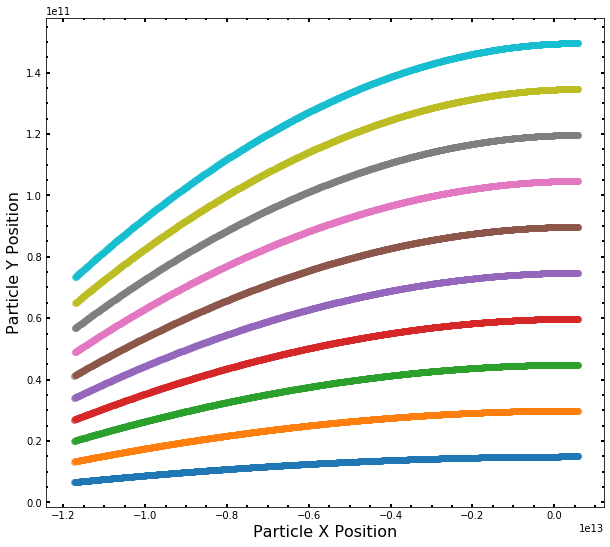

In [590]:
fig, ax = plt.subplots(figsize=[10,9])

for i in range(N):
    for j in range(P):
        ax.scatter(XPos[j,i], YPos[j,i], marker='o', alpha=0.5)
        #ax.scatter(0,-0.1e11,s=50,color='black')
        #ax.set_ylim(-0.2e12,0.2e12)
        #ax.set_xlim(-0.3e12,0.3e12)
        ax.set_xlabel('Particle X Position',fontsize=16)
        ax.set_ylabel('Particle Y Position',fontsize=16)
        ax.tick_params(which='both', direction='in',width=2)
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')